# HW06: ML and Causal Inference (due November 9th)

## Exercise 1: Double Machine learning with Lasso

In this exercise you will investigate a research question similar to the one in HW02. Namely, what is the effect of being in a Union on wages? You will use the same data as in HW02 (description of the variables can be found [here](https://rdrr.io/rforge/sampleSelection/man/nlswork.html)). Although, here instead of just including controls, you will estimate the effect of union membership on wages using double Lasso.

The regression of reference is the following: 

$$ln\_wage_i = \beta_0 + \beta_1 union_i +\varepsilon_i$$

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
# Load Data (NLSY)
df = pd.read_stata('http://www.stata-press.com/data/r16/nlswork.dta')
df = df.dropna()
df.reset_index(drop=True, inplace=True)

In [3]:
df.head()

,idcode,year,birth_yr,age,race,msp,nev_mar,grade,collgrad,not_smsa,...,south,ind_code,occ_code,union,wks_ue,ttl_exp,tenure,hours,wks_work,ln_wage
0,1,72,51,20.0,black,1.0,0.0,12.0,0,0.0,...,0.0,4.0,6.0,1.0,0.0,2.256410,0.916667,40.0,51.0,1.589977
1,1,77,51,25.0,black,0.0,0.0,12.0,0,0.0,...,0.0,12.0,8.0,0.0,0.0,3.775641,1.500000,32.0,52.0,1.778681
2,1,80,51,28.0,black,0.0,0.0,12.0,0,0.0,...,0.0,5.0,6.0,1.0,0.0,5.294872,1.833333,45.0,75.0,2.551715
3,1,85,51,33.0,black,0.0,0.0,12.0,0,0.0,...,0.0,5.0,6.0,1.0,0.0,7.160256,1.916667,42.0,97.0,2.614172
4,1,87,51,35.0,black,0.0,0.0,12.0,0,0.0,...,0.0,5.0,6.0,1.0,0.0,8.987180,3.916667,45.0,95.0,2.536374


In [4]:
import numpy as np
Y = df['ln_wage']
D = df['union']

In [5]:
import statsmodels.formula.api as smf

## Run the regression written above
res = smf.ols("ln_wage ~ union", df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ln_wage   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     741.9
Date:                Sat, 04 Nov 2023   Prob (F-statistic):          4.56e-159
Time:                        18:29:09   Log-Likelihood:                -8266.7
No. Observations:               13452   AIC:                         1.654e+04
Df Residuals:                   13450   BIC:                         1.655e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6564      0.004    377.147      0.000       1.648       1.665
union          0.2502      0.009     27.238      0.000       0.232       0.268
==============================================================================
Omnibus:                      425.572   Durbin-Watson:                   1.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              895.660
Skew:                           0.205   Prob(JB):                    3.24e-195
Kurtosis:                       4.196   Cond. No.                         2.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**What could be potential sources of bias (i.e. confounders)?**

Age, grade, collgrad could be potential confounders. For instance, age direclty impact the wage of the individual. More experienced individuals earn more. Also, as people are older they had more time to join unions and time trends can affect the union probability.

In [6]:
pd.set_option("display.max_columns", None)
df.head()

,idcode,year,birth_yr,age,race,msp,nev_mar,grade,collgrad,not_smsa,c_city,south,ind_code,occ_code,union,wks_ue,ttl_exp,tenure,hours,wks_work,ln_wage
0,1,72,51,20.0,black,1.0,0.0,12.0,0,0.0,1.0,0.0,4.0,6.0,1.0,0.0,2.256410,0.916667,40.0,51.0,1.589977
1,1,77,51,25.0,black,0.0,0.0,12.0,0,0.0,1.0,0.0,12.0,8.0,0.0,0.0,3.775641,1.500000,32.0,52.0,1.778681
2,1,80,51,28.0,black,0.0,0.0,12.0,0,0.0,1.0,0.0,5.0,6.0,1.0,0.0,5.294872,1.833333,45.0,75.0,2.551715
3,1,85,51,33.0,black,0.0,0.0,12.0,0,0.0,1.0,0.0,5.0,6.0,1.0,0.0,7.160256,1.916667,42.0,97.0,2.614172
4,1,87,51,35.0,black,0.0,0.0,12.0,0,0.0,0.0,0.0,5.0,6.0,1.0,0.0,8.987180,3.916667,45.0,95.0,2.536374


In [96]:
# fill in X with all predictors that are not colliders
# wage and union has a certain impact on the wks_work, hours, wks_ue, occ_code and ind_code
X_cat = df[["year", "race", 'msp', 'nev_mar', 'collgrad', 'not_smsa', 'c_city', 'south', 'union']]
X_cont = df[["age", "birth_yr", "ttl_exp", "tenure", "grade"]]

In [97]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [98]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

X_cat_columns = X_cat.columns
X_cat = encoder.fit_transform(X_cat)
X_cat = X_cat.astype('float32')
X_cat = pd.DataFrame(X_cat, columns=X_cat_columns)

In [99]:
# Standardize all continuous variable in X to variance one
from sklearn.preprocessing import StandardScaler
X_cont = pd.DataFrame(StandardScaler().fit_transform(X_cont), columns=X_cont.columns)

In [100]:
# join all Xs
X = pd.merge(X_cat, X_cont, left_index=True, right_index=True)
X

,year,race,msp,nev_mar,collgrad,not_smsa,c_city,south,union,age,birth_yr,ttl_exp,tenure,grade
0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.590810,0.953870,-1.024537,-0.671341,-0.287475
1,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.811221,0.953870,-0.679933,-0.516603,-0.287475
2,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.343467,0.953870,-0.335330,-0.428182,-0.287475
3,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.436123,0.953870,0.087792,-0.406077,-0.287475
4,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.747959,0.953870,0.502189,0.124452,-0.287475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13447,4.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.280205,-1.354124,-1.063796,-0.361866,-0.287475
13448,5.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.436123,-1.354124,-0.855870,-0.118707,-0.287475
13449,8.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.215712,-1.354124,0.295717,1.207614,-0.287475
13450,9.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.527548,-1.354124,0.522545,-0.914500,-0.287475


In [101]:
# Generate train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, D_train, D_test, y_train, y_test = train_test_split(X, D, Y, test_size=0.2)

The econml library allows us to distinguish between two different types of confounders represented by a matrix *X* and a matrix *W*.

- *X* : confounders that interact with the treatment. we will be able to calculate heterogeneous treatment effects using them.
- *W*: confounders that don´t interact with the treatment. this can be a very high-dimensional matrix.

To be precise our model with these two types of confounders looks as follows:

$$ Y = D \cdot g(X) + W +  e $$

Where D is our treatment variable. In this first demonstration of double machine learning we will not focus on heterogeneous treatment effects and thus we will have all of our confounders as *W*.

In [102]:
# Define DML model with double LASSO

from econml.dml import  LinearDML
from sklearn.linear_model import LassoCV, LogisticRegressionCV

# LinearDML: https://econml.azurewebsites.net/_autosummary/econml.dml.LinearDML.html
est = LinearDML(model_y=LassoCV(),          # Y
                model_t=LogisticRegressionCV(), # D    
                discrete_treatment=True,
                linear_first_stages=True,
                cv=5)

In [103]:
# Fit the model
est.fit(y_train, D_train, X=None, W=X_train) 

In [104]:
# Display a summary
est.summary()

Coefficient Results:  X is None, please call intercept_inference to learn the constant!


,point_estimate,stderr,zstat,pvalue,ci_lower,ci_upper
cate_intercept,0.005,0.022,0.229,0.819,-0.039,0.049


**Compare the estimates form this and the previous regression. How do these change?**

**Answer:**

Prior to the regression, the union was 25% positevely correlated with the wage. After the double machine learning, we concluded that the union was not correlated to the wage since the err is more than 2 times the coeff and the confidence interval contains 0.

**Interpret the coefficient from the double ml approach. Can it be interpreted as causal?**

**Answer:**

No, it cannot be interpreted as causal like mentioned above.

## Exercise 2: Heterogenous Treatment Effects with double Lasso

This exercise will be a simple extension of exercise 1. We just want to estimate a CausalForestDML model where we can analyze heterogeneous treatment effects.

In [105]:
# CausalForestDML: https://econml.azurewebsites.net/_autosummary/econml.dml.CausalForestDML.html
from econml.dml import CausalForestDML

In [108]:
# Define the model. check the documentation, you might need to specify less things than you think...
est2 = CausalForestDML(model_y='auto',
                       model_t='auto',
                       discrete_treatment=True,
                       n_estimators=100,
                       max_depth=30,
                       cv=5)

In [111]:
# Tune the model
est2.tune(y_train, D_train, X=X_train) 

In [113]:
# Fit the model
est2.fit(y_train, D_train, X=X_train) 

In [114]:
# Display summary
est2.summary()

Population summary results are available only if `cache_values=True` at fit time!


,point_estimate,stderr,zstat,pvalue,ci_lower,ci_upper
ATE,-0.033,0.006,-5.377,0.0,-0.045,-0.021
,point_estimate,stderr,zstat,pvalue,ci_lower,ci_upper
ATT,-0.016,0.007,-2.329,0.02,-0.03,-0.003
,point_estimate,stderr,zstat,pvalue,ci_lower,ci_upper
ATT,-0.091,0.013,-6.848,0.0,-0.117,-0.065


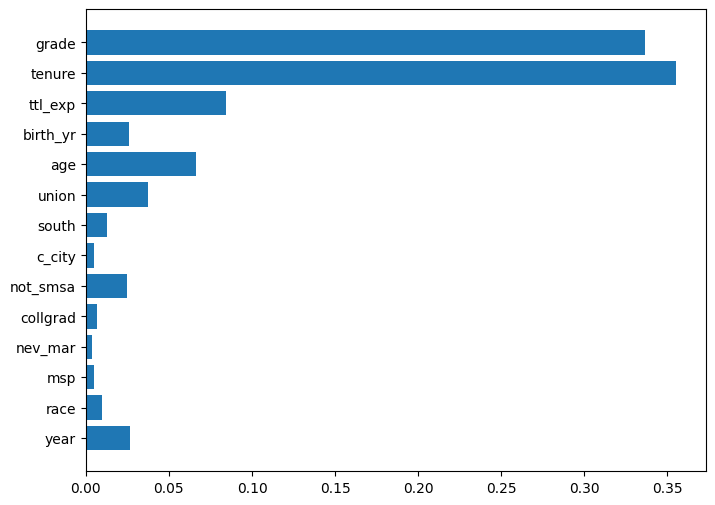

In [115]:
# Visualize the feature importance
from matplotlib import pyplot as plt

plt.figure(figsize=(8,6))
plt.barh(est2.cate_feature_names(), est2.feature_importances_)
plt.show()